#### Copyright 2020 Google LLC.

In [ ]:
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# Classification Project

In this project you will apply what you have learned about classification and TensorFlow to complete a project from Kaggle. The challenge is to achieve a high accuracy score while trying to predict which passengers survived the Titanic ship crash. After building your model, you will upload your predictions to Kaggle and submit the score that you get.

## The Titanic Dataset

[Kaggle](https://www.kaggle.com) has a [dataset](https://www.kaggle.com/c/titanic/data) containing the passenger list on the Titanic. The data contains passenger features such as age, gender, ticket class, as well as whether or not they survived.

Your job is to create a binary classifier using TensorFlow to determine if a passenger survived or not. The `Survived` column lets you know if the person survived. Then, upload your predictions to Kaggle and submit your accuracy score at the end of this Colab, along with a brief conclusion.


To get the dataset, you'll need to accept the competition's rules by clicking the "I understand and accept" button on the [competition rules page](https://www.kaggle.com/c/titanic/rules). Then upload your `kaggle.json` file and run the code below.

In [ ]:
! chmod 600 kaggle.json && (ls ~/.kaggle 2>/dev/null || mkdir ~/.kaggle) && cp kaggle.json ~/.kaggle/ && echo 'Done'
! kaggle competitions download -c titanic
! ls

Done
  0% 0.00/59.8k [00:00<?, ?B/s]
100% 59.8k/59.8k [00:00<00:00, 21.7MB/s]
  0% 0.00/28.0k [00:00<?, ?B/s]
100% 28.0k/28.0k [00:00<00:00, 26.6MB/s]
  0% 0.00/3.18k [00:00<?, ?B/s]
100% 3.18k/3.18k [00:00<00:00, 1.69MB/s]
gender_submission.csv  kaggle.json  sample_data  test.csv  train.csv


**Note: If you see a "403 - Forbidden" error above, you still need to click "I understand and accept" on the [competition rules page](https://www.kaggle.com/c/titanic/rules).**

Three files are downloaded:

1. `train.csv`: training data (contains features and targets)
1. `test.csv`: feature data used to make predictions to send to Kaggle
1. `gender_submission.csv`: an example competition submission file

## Step 1: Exploratory Data Analysis

Perform exploratory data analysis and data preprocessing. Use as many text and code blocks as you need to explore the data. Note any findings. Repair any data issues you find.

**Student Solution**

In [ ]:
# Your code goes here
import pandas as pd

train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

frames = [train_df, test_df]

df = pd.concat(frames)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [ ]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,891.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,655.000000,0.383838,2.294882,29.881138,0.498854,0.385027,33.295479
std,378.020061,0.486592,0.837836,14.413493,1.041658,0.865560,51.758668
min,1.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,328.000000,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,655.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,982.000000,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000
max,1309.000000,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200


In [ ]:
def check_null(series):
    return series.isnull().any()

def change_to_unknown(series, value):
    df.loc[series, series.name] = value

### Check null

In [ ]:
print("Check null")
for column in df.columns:
    if check_null(df[column]):
        print("{}: {}".format(column, check_null(df[column])))

Check null
Survived: True
Age: True
Fare: True
Cabin: True
Embarked: True


In [ ]:
# Drop null value
df.dropna(subset=['Survived', 'Age', 'Fare'], inplace=True)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
885,886,0.0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0.0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1.0,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,890,1.0,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
is_embarked_unknown = df['Embarked'].isna()
df.drop(df[is_embarked_unknown].index, inplace=True)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
885,886,0.0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0.0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1.0,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,890,1.0,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
df.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin'], inplace=True)
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0.0,3,male,22.0,1,0,7.2500,S
1,1.0,1,female,38.0,1,0,71.2833,C
2,1.0,3,female,26.0,0,0,7.9250,S
3,1.0,1,female,35.0,1,0,53.1000,S
4,0.0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
885,0.0,3,female,39.0,0,5,29.1250,Q
886,0.0,2,male,27.0,0,0,13.0000,S
887,1.0,1,female,19.0,0,0,30.0000,S
889,1.0,1,male,26.0,0,0,30.0000,C


### One-Hot Encoding

In [ ]:
one_hot = [0 if gender == 'male' else 1 for gender in df['Sex'].values]
df['Sex'] = one_hot
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0.0,3,0,22.0,1,0,7.2500,S
1,1.0,1,1,38.0,1,0,71.2833,C
2,1.0,3,1,26.0,0,0,7.9250,S
3,1.0,1,1,35.0,1,0,53.1000,S
4,0.0,3,0,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
885,0.0,3,1,39.0,0,5,29.1250,Q
886,0.0,2,0,27.0,0,0,13.0000,S
887,1.0,1,1,19.0,0,0,30.0000,S
889,1.0,1,0,26.0,0,0,30.0000,C


In [ ]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

embarked = df['Embarked'].to_numpy()

# Labelling
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(embarked)

# One Hot Encoding
one_hot_encoder = OneHotEncoder(sparse=False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
one_hot_encoded = one_hot_encoder.fit_transform(integer_encoded).astype('int')

# Drop Embarked column
df.drop(columns='Embarked', inplace=True)

# Add one hot encoded
columns = ['Cherbourg', 'Queenstown', 'Southampton']
for index, column in enumerate(columns):
    df[column] = one_hot_encoded[:, index]
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cherbourg,Queenstown,Southampton
0,0.0,3,0,22.0,1,0,7.2500,0,0,1
1,1.0,1,1,38.0,1,0,71.2833,1,0,0
2,1.0,3,1,26.0,0,0,7.9250,0,0,1
3,1.0,1,1,35.0,1,0,53.1000,0,0,1
4,0.0,3,0,35.0,0,0,8.0500,0,0,1
...,...,...,...,...,...,...,...,...,...,...
885,0.0,3,1,39.0,0,5,29.1250,0,1,0
886,0.0,2,0,27.0,0,0,13.0000,0,0,1
887,1.0,1,1,19.0,0,0,30.0000,0,0,1
889,1.0,1,0,26.0,0,0,30.0000,1,0,0


### Change data types

In [ ]:
df['Survived'] = df['Survived'].astype('int')
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cherbourg,Queenstown,Southampton
0,0,3,0,22.0,1,0,7.2500,0,0,1
1,1,1,1,38.0,1,0,71.2833,1,0,0
2,1,3,1,26.0,0,0,7.9250,0,0,1
3,1,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,0,35.0,0,0,8.0500,0,0,1
...,...,...,...,...,...,...,...,...,...,...
885,0,3,1,39.0,0,5,29.1250,0,1,0
886,0,2,0,27.0,0,0,13.0000,0,0,1
887,1,1,1,19.0,0,0,30.0000,0,0,1
889,1,1,0,26.0,0,0,30.0000,1,0,0


In [ ]:
import numpy as np

ages = [x for x in df['Age']]
age_arr = np.array([])

for age in ages:
    age_arr = np.append(age_arr, round(age))

age_arr = age_arr.astype('int')
df['Age'] = age_arr
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cherbourg,Queenstown,Southampton
0,0,3,0,22,1,0,7.2500,0,0,1
1,1,1,1,38,1,0,71.2833,1,0,0
2,1,3,1,26,0,0,7.9250,0,0,1
3,1,1,1,35,1,0,53.1000,0,0,1
4,0,3,0,35,0,0,8.0500,0,0,1
...,...,...,...,...,...,...,...,...,...,...
885,0,3,1,39,0,5,29.1250,0,1,0
886,0,2,0,27,0,0,13.0000,0,0,1
887,1,1,1,19,0,0,30.0000,0,0,1
889,1,1,0,26,0,0,30.0000,1,0,0


### Visualization

In [ ]:
print("Check null")
for column in df.columns:
    if check_null(df[column]):
        print("{}: {}".format(column, check_null(df[column])))

Check null


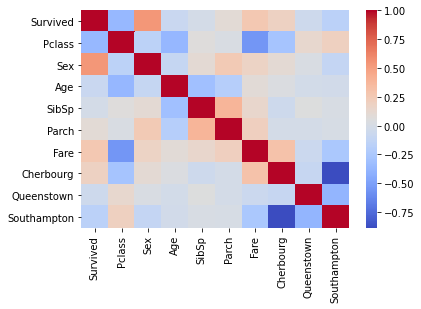

In [ ]:
import seaborn as sns

_ = sns.heatmap(df.corr(), cmap='coolwarm')

---

## Step 2: The Model

Build, fit, and evaluate a classification model. Perform any model-specific data processing that you need to perform. If the toolkit you use supports it, create visualizations for loss and accuracy improvements. Use as many text and code blocks as you need to explore the data. Note any findings.

**Student Solution**

In [ ]:
# Your code goes here
FEATURES= df.columns.values[1:]
TARGET = df.columns.values[0]

FEATURES, TARGET

(array(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Cherbourg',
        'Queenstown', 'Southampton'], dtype=object), 'Survived')

In [ ]:
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split


class MyCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        if logs.get('accuracy') >= 0.9:
            print("\nAccuracy has reached more than 89%")
            self.model.stop_training = True

new_df = df.copy()
new_df.loc[:, FEATURES] = ((new_df[FEATURES] - new_df[FEATURES].min()) /
                           (new_df[FEATURES].max() - new_df[FEATURES].min()))

X_train, X_test, y_train, y_test = train_test_split(
    new_df[FEATURES], new_df[TARGET], test_size=0.2, random_state=42
)

model = keras.Sequential([keras.layers.Dense(512, activation=tf.nn.relu,
                                             input_shape=(FEATURES.size, )),
                          keras.layers.Dense(256, activation=tf.nn.relu),
                          keras.layers.Dense(128, activation=tf.nn.relu),
                          keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

model.summary()

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

EPOCHS = 500
callbacks = MyCallback()

history = model.fit(X_train, y_train, epochs=EPOCHS, callbacks=[callbacks])

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 512)               5120      
_________________________________________________________________
dense_5 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_6 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 129       
Total params: 169,473
Trainable params: 169,473
Non-trainable params: 0
_________________________________________________________________
Epoch 1/500
18/18 [==============================] - 1s 4ms/step - loss: 0.6153 - accuracy: 0.6642
Epoch 2/500
18/18 [==============================] - 0s 4ms/step - loss: 0.4935 - accuracy: 0.7680
Epoch 3/500
18/18 [=============================

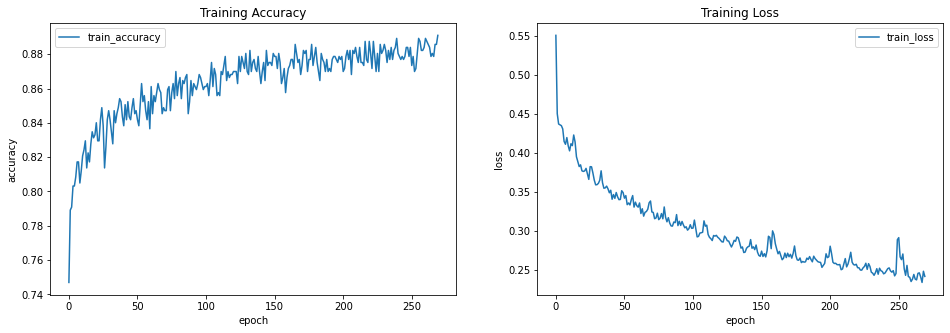

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(16,5))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'])
plt.title('Training Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train_accuracy'], loc='best')

plt.subplot(1,2,2)
plt.plot(history.history['loss'])
plt.title('Training Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train_loss'], loc='best')

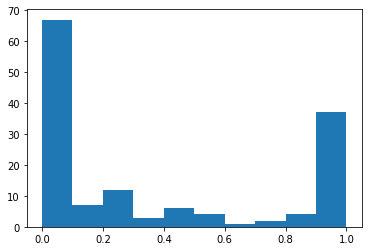

In [ ]:
predictions = model.predict(X_test)
_ = plt.hist(predictions)

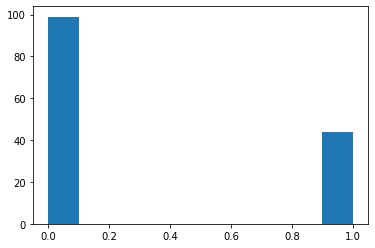

In [ ]:
THRESHOLD = 0.6

higher_threshold = [1 if x >= THRESHOLD else 0 for x in predictions]
higher_threshold = np.array(higher_threshold)

_ = plt.hist(higher_threshold)

In [ ]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, higher_threshold)

0.7692307692307693

---

## Step 3: Make Predictions and Upload To Kaggle

In this step you will make predictions on the features found in the `test.csv` file and upload them to Kaggle using the [Kaggle API](https://github.com/Kaggle/kaggle-api). Use as many text and code blocks as you need to explore the data. Note any findings.

**Student Solution**

In [ ]:
# Your code goes here


What was your Kaggle score?

> *Record your score here*

---

## Step 4: Iterate on Your Model

In this step you're encouraged to play around with your model settings and to even try different models. See if you can get a better score. Use as many text and code blocks as you need to explore the data. Note any findings.

**Student Solution**

In [ ]:
# Your code goes here

---